In [5]:
%matplotlib inline

In [2]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
import eelbrain
import mne
import trftools

from pprint import pprint
import numpy as np

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq


##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
    }

[['13', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['14', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['12', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['15', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['11', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['16', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['17', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['18', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['19', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['20', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['21', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['01', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['03', <NDVar '1': 59 sensor>, <NDVar 'envelope': 59 sensor, 114 time>],
 ['04', <NDVar '1': 59 sensor>, <NDVar

Permutation test: 100%|██████| 10000/10000 [00:03<00:00, 2752.46 permutations/s]


"\ntrf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))\ntrf_sensor = trf.proportion_explained\nprint(trf_sensor)\nprint(trf.h[0].shape)\n\n#print(type(trf.h))\n#plt.plot(trf.h[:,0,:])\np = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)\n\n#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)\n#p.set_time(.180)\n"

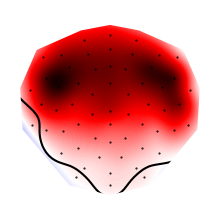

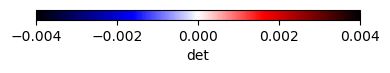

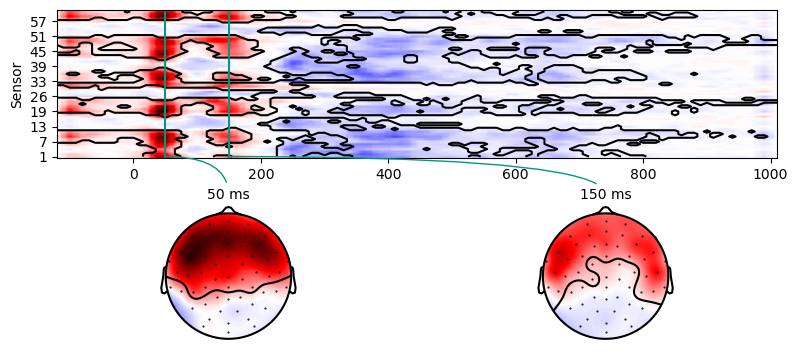

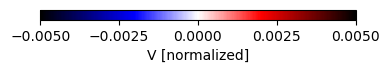

In [12]:
## TRF: envelope ##
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, trf.h[0]])#.abs()])
data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], n_rowsLIST)
pprint(n_rowsLIST)
print(data_env)


#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.05)
p = eelbrain.plot.Topomap(test_envelope)
cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 

trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.05)

p = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w=8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)

p.save(TRF_DIR / 'Natives_Envelope+onset-TRFs.png')

"""
trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))
trf_sensor = trf.proportion_explained
print(trf_sensor)
print(trf.h[0].shape)

#print(type(trf.h))
#plt.plot(trf.h[:,0,:])
p = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)

#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)
#p.set_time(.180)
"""

<class 'eelbrain.plot._topo.TopoArray'>


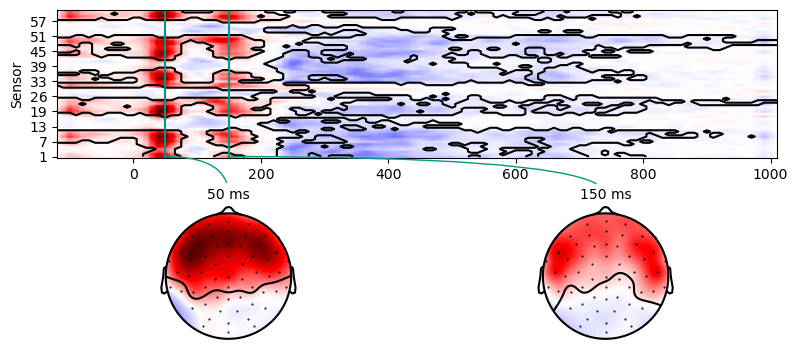

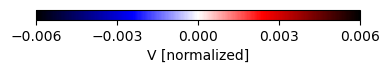

In [11]:
p = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w = 8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p.plot_colorbar(width=0.1)
print(type(p))
p.save(TRF_DIR / 'Natives_Envelope-TRFs.png')